In [1]:
####################################################
#### Time Stamp Prediction              ############
#### Auther : asiriamal                 ############
#### Instructor : Oshanidi              ############
#### Date : 22/01/2020                  ############
####################################################

# Time Stamp Prediction

Files Used : data.csv as data and labels.csv as labels

# Data preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import datetime as dt

In [2]:
data = pd.read_csv("../formatedData/1/data.csv", sep=';')

In [3]:
data.head()

,TimeStamp,FrameCounter,State,RPM,ObjectDistance,SignalQuality,MovementSlow,MovementFast
0,2017-11-22T23:45:00.859+01:00,32734,1,0.0,0.989470,4,14.2693,0.055457
1,2017-11-22T23:45:01.855+01:00,32751,1,0.0,0.987036,4,12.2064,0.088731
2,2017-11-22T23:45:02.852+01:00,32768,1,0.0,1.008620,7,10.8458,1.696980
3,2017-11-22T23:45:03.848+01:00,32785,2,0.0,0.976657,0,11.2901,2.628660
4,2017-11-22T23:45:04.845+01:00,32802,1,0.0,0.958549,0,13.4203,3.826530


In [4]:
data.tail()

,TimeStamp,FrameCounter,State,RPM,ObjectDistance,SignalQuality,MovementSlow,MovementFast
24700,2017-11-23T06:35:25.513+01:00,452634,0,16.5326,0.711621,10,29.1574,0.587844
24701,2017-11-23T06:35:26.509+01:00,452651,0,16.1115,0.713980,10,29.3478,0.754215
24702,2017-11-23T06:35:27.508+01:00,452668,0,15.9265,0.718161,10,29.7009,1.685890
24703,2017-11-23T06:35:28.503+01:00,452685,0,15.5886,0.722880,10,30.6569,1.818990
24704,2017-11-23T06:35:29.500+01:00,452702,0,15.5886,0.722880,10,32.6087,1.885540


### There is no missing values in the dataset

In [5]:
data.isnull().sum()

TimeStamp         0
FrameCounter      0
State             0
RPM               0
ObjectDistance    0
SignalQuality     0
MovementSlow      0
MovementFast      0
dtype: int64

### Data.csv file has 8 coumns

In [6]:
print(len(data.columns))
data.columns

8


Index(['TimeStamp', 'FrameCounter', 'State', 'RPM', 'ObjectDistance',
       'SignalQuality', 'MovementSlow', 'MovementFast'],
      dtype='object')

### 7 numerical variables and 1 categorical variable
* TimeStamp          object
* FrameCounter        int64
* State               int64
* RPM               float64
* ObjectDistance    float64
* SignalQuality       int64
* MovementSlow      float64
* MovementFast      float64

In [7]:
print(len(data.describe().columns))
data.describe().columns

7


Index(['FrameCounter', 'State', 'RPM', 'ObjectDistance', 'SignalQuality',
       'MovementSlow', 'MovementFast'],
      dtype='object')

In [8]:
data.dtypes

TimeStamp          object
FrameCounter        int64
State               int64
RPM               float64
ObjectDistance    float64
SignalQuality       int64
MovementSlow      float64
MovementFast      float64
dtype: object

## Check Correlations

<function matplotlib.pyplot.show(*args, **kw)>

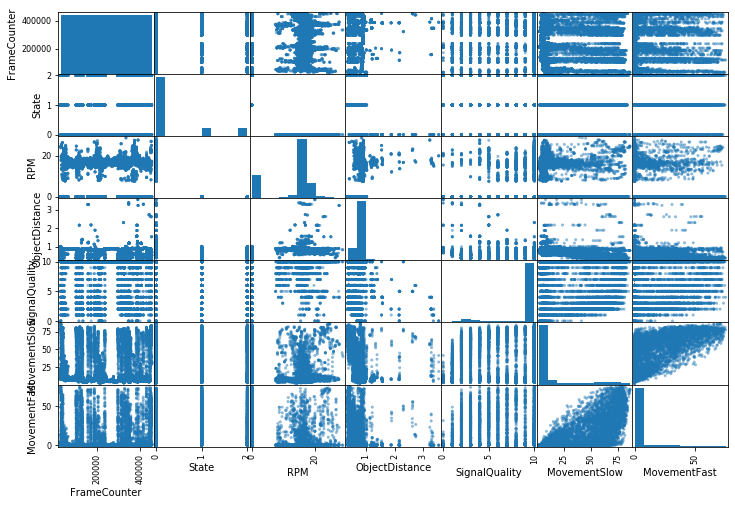

In [9]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(12, 8))
plt.show

We can clearly, MovmentFast and MovementSlow have somewhat correlation and sate has distributed corelation so using state will not effective for the predictions

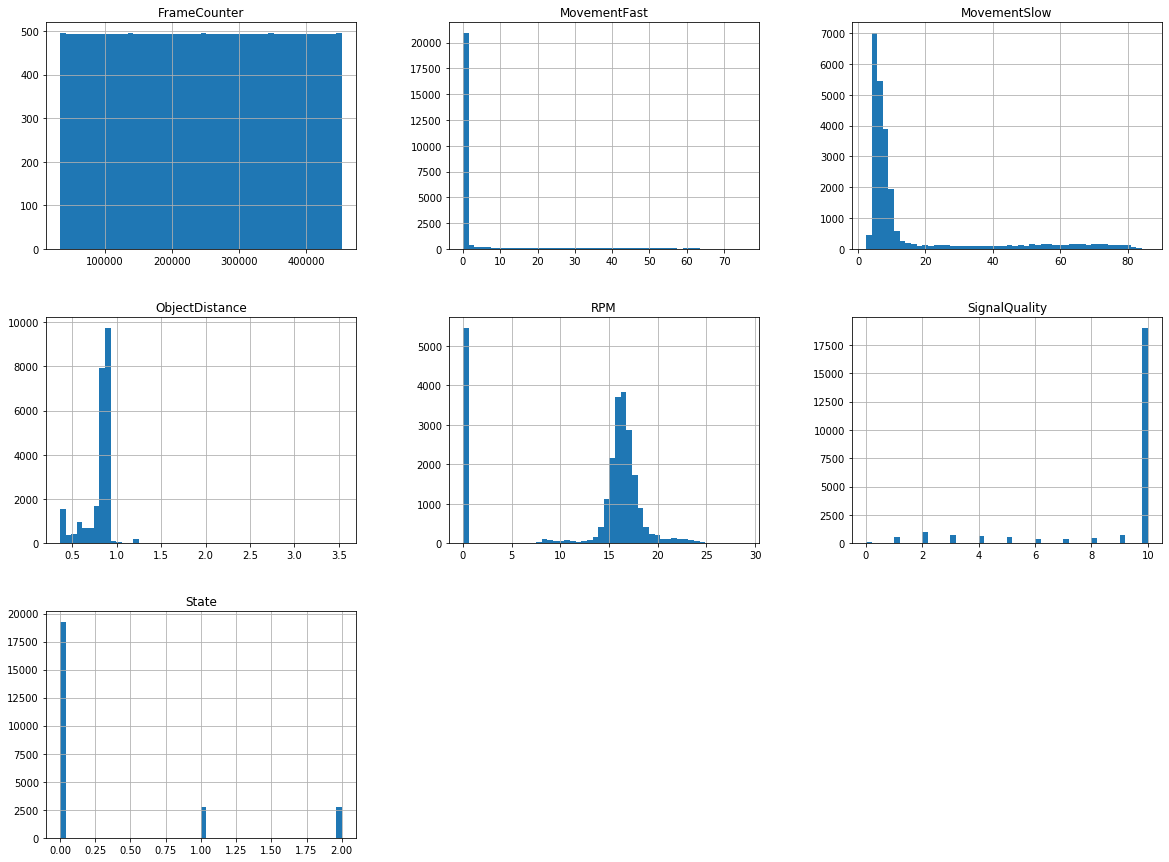

In [10]:
data.hist(bins=50, figsize=(20,15))
plt.show()

##### According to above histogram FrameCounter does not give valuable information for the prediction it is just a counter, So further training tasks

### Remove miliseconds in timestap

In [11]:
data['TimeStamp'] = data['TimeStamp'].str.slice(stop=-10)

In [12]:
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

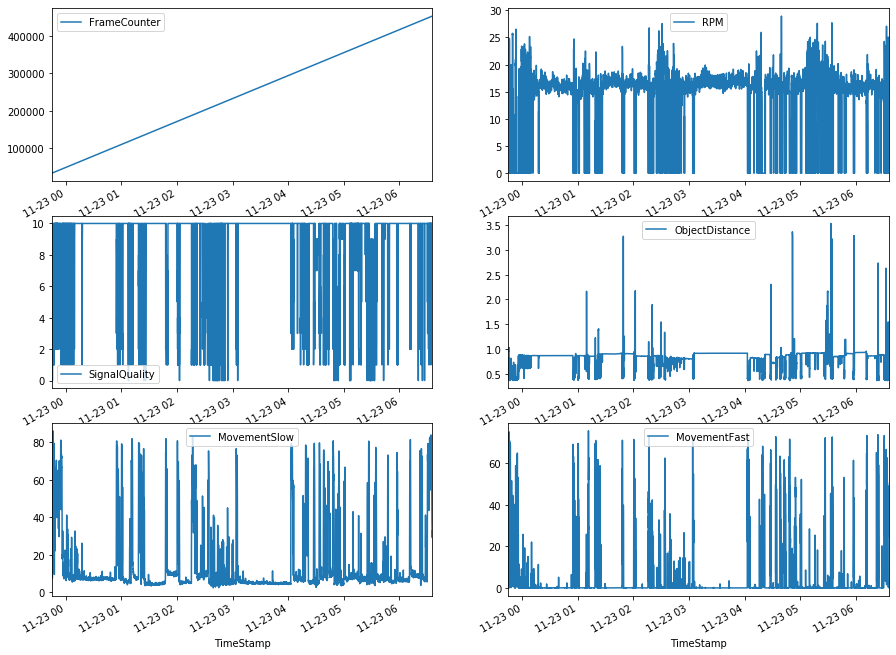

In [13]:
# fig, ax1 = plt.subplots(1,1,figsize=(8,4))
# data.plot(x='TimeStamp',y='State', ax=ax1)
fig, axes = plt.subplots(3,2,figsize=(15, 12))
data.plot(x='TimeStamp',y='FrameCounter', ax=axes[0,0])
data.plot(x='TimeStamp',y='SignalQuality', ax=axes[1,0])
data.plot(x='TimeStamp',y='RPM', ax=axes[0,1])
data.plot(x='TimeStamp',y='ObjectDistance', ax=axes[1,1])
data.plot(x='TimeStamp',y='MovementSlow', ax=axes[2,0])
data.plot(x='TimeStamp',y='MovementFast', ax=axes[2,1])
plt.show()

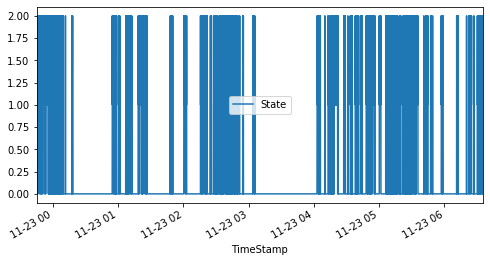

In [14]:
fig, ax1 = plt.subplots(1,1,figsize=(8,4))
data.plot(x='TimeStamp',y='State', ax=ax1)
plt.show()

In [15]:
# pd.to_datetime(data['TimeStamp'], format='%d%b%Y:%H:%M:%S.%f')
data['Date'] = [d.date() for d in data['TimeStamp']]
data['Time'] = [d.time() for d in data['TimeStamp']]

In [16]:
mid = data['Date']
data.drop("Date", axis=1,inplace = True)
data.insert(0, 'Date', mid)

mid = data['Time']
data.drop("Time", axis=1,inplace = True)
data.insert(1, 'Time', mid)

data.drop("TimeStamp", axis=1, inplace=True)

In [17]:
data

,Date,Time,FrameCounter,State,RPM,ObjectDistance,SignalQuality,MovementSlow,MovementFast
0,2017-11-22,23:45:00,32734,1,0.0000,0.989470,4,14.26930,0.055457
1,2017-11-22,23:45:01,32751,1,0.0000,0.987036,4,12.20640,0.088731
2,2017-11-22,23:45:02,32768,1,0.0000,1.008620,7,10.84580,1.696980
3,2017-11-22,23:45:03,32785,2,0.0000,0.976657,0,11.29010,2.628660
4,2017-11-22,23:45:04,32802,1,0.0000,0.958549,0,13.42030,3.826530
5,2017-11-22,23:45:05,32819,1,0.0000,1.021660,5,16.41150,3.981810
6,2017-11-22,23:45:06,32836,2,0.0000,1.021190,6,18.86310,2.639750
7,2017-11-22,23:45:07,32853,1,0.0000,1.020810,6,20.23170,2.107360
8,2017-11-22,23:45:08,32870,1,0.0000,1.022360,6,21.00920,1.563890
9,2017-11-22,23:45:09,32887,2,0.0000,1.023690,6,21.32260,1.197870


In [18]:
data["State"].value_counts()

0    19241
2     2741
1     2723
Name: State, dtype: int64

In [19]:
# data["RPM"].value_counts(ascending=True)

In [20]:
# data["ObjectDistance"].value_counts()

In [21]:
data["SignalQuality"].value_counts()

10    19018
2      1037
3       735
9       702
4       640
1       583
5       553
8       514
7       419
6       399
0       105
Name: SignalQuality, dtype: int64

In [22]:
# data["MovementSlow"].value_counts()

# Labels

In [37]:
labels = pd.read_csv("../formatedData/1/labels.csv",sep=',')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 6


In [28]:
labels.describe()

,000,0
count,820.0,820.000000
mean,0.0,2.486585
std,0.0,1.141327
min,0.0,0.000000
25%,0.0,2.000000
50%,0.0,3.000000
75%,0.0,3.000000
max,0.0,4.000000


In [29]:
labels.head()

,23:45:00,000,0
0,23:45:30,0,0
1,23:46:00,0,0
2,23:46:30,0,0
3,23:47:00,0,0
4,23:47:30,0,0


In [30]:
labels.tail()

,23:45:00,000,0
815,06:33:00,0,0
816,06:33:30,0,0
817,06:34:00,0,0
818,06:34:30,0,0
819,06:35:00,0,2


Labels has only one colum

In [31]:
print(len(labels.columns))
labels.columns

3


Index(['23:45:00', '000', '0'], dtype='object')

In [32]:
# labels['Start Time: 22.11.2017 23:45:00'].hist(bins=50)
# plt.show()

In [33]:
# labels['TimeStamp'] = labels['Start Time: 22.11.2017 23:45:00'].str.slice(stop=-4)
labels.iloc[-1:]

,23:45:00,000,0
819,06:35:00,0,2


In [34]:
labels.dtypes

23:45:00    object
000          int64
0            int64
dtype: object

In [35]:
labels = labels.reset_index()
labels["TimeStamp"] = labels["index"]
labels = labels.drop("index", axis=1)
mid = labels['TimeStamp']
labels.drop(labels=['TimeStamp'], axis=1,inplace = True)
labels.insert(0, 'TimeStamp', mid)

In [36]:
labels["Label"] = labels["Start Time: 22.11.2017 23:45:00"].str.slice(start=-1)

KeyError: 'Start Time: 22.11.2017 23:45:00'

In [ ]:
labels = labels.drop("Start Time: 22.11.2017 23:45:00", axis=1)

In [ ]:
# labels['TimeStamp'] = [d.time() for d in labels['TimeStamp']]
ad = pd.to_datetime(labels['TimeStamp'])
labels['TimeStamp'] = ad.dt.strftime('%H:%M:%S')


In [ ]:
labels.describe()

In [ ]:
# labels["TimeStamp"].iloc[0]

In [ ]:
data.head()

In [ ]:
data.tail()

### There is a missing in 30 pattern in data file

In [ ]:
data["Time"].iloc[::30]

# Data Preparation

Below function returns the all 00 and 30 second times in the data file

In [ ]:
data

In [ ]:
labels

In [ ]:
j=0
k=0

begins = []

for i in range(len(data)):
    a = data["Time"].iloc[i]

    if (a.second==0 or a.second==30):
#         print(i-k, i)
        begins.append(i)
        j+=1
        k = i
print(j)
print(begins)

In [ ]:
len(data)

In [ ]:
data1 = data.drop("Time", axis=1)
data1 = data1.drop("Date", axis=1)
data1 = data1.drop("FrameCounter", axis=1)
data1 = data1.drop("State", axis=1)

data_time = data.filter(["Time", "Date"], axis=1)

In [ ]:
data_time.head()

In [ ]:
data1.head()

In [24]:
i = 1
# time1 = str(data_time["Time"].iloc[begins[i]])
time = str(data_time["Time"].iloc[begins[i]])
date = str(data_time["Date"].iloc[begins[i]])
features = np.array(data1.iloc[begins[i]: begins[i+1]])
label = labels["Label"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i]])].values[0]
labels["TimeStamp"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i]])].values[0]

NameError: name 'data_time' is not defined

In [25]:
print(time, date, label)

NameError: name 'time' is not defined

In [126]:
dataFrame = []
for i in range(len(begins)-1):
    row = []
    time = str(data_time["Time"].iloc[begins[i]])
    date = str(data_time["Date"].iloc[begins[i]])
    features = np.array(data1.iloc[begins[i]: begins[i+1]])
    label = labels["Label"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i]])].values[0]
    startTime = labels["TimeStamp"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i]])].values[0]
    endTime = labels["TimeStamp"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i+1]])].values[0]
    row.append(date)
#     row.append(time)
    row.append(startTime)
    row.append(endTime)
    row.append(features)
    row.append(label)
    dataFrame.append(row)
#     print(date, time, features, label)

In [171]:
avgFrame = []
for i in range(len(begins)-1):
    row = []
    time = str(data_time["Time"].iloc[begins[i]])
    date = str(data_time["Date"].iloc[begins[i]])
    features = (data1.iloc[begins[i]: begins[i+1]]).mean().to_frame().transpose().values[0]
    label = labels["Label"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i]])].values[0]
    startTime = labels["TimeStamp"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i]])].values[0]
    endTime = labels["TimeStamp"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i+1]])].values[0]
    row.append(date)
#     row.append(time)
    row.append(startTime)
    row.append(endTime)
    row.extend(features)
    row.append(label)
    avgFrame.append(row)
#     print(date, time, features, label)

In [172]:
f = (data1.iloc[begins[i]: begins[i+1]]).mean()

In [173]:
avgFrame[0]

['2017-11-22',
 '23:45:00',
 '23:45:30',
 0.0,
 1.0050128000000003,
 4.233333333333333,
 17.183041999999997,
 1.03297862,
 '0']

In [144]:
c = data1.iloc[begins[2]: begins[3]]

In [177]:
c.mean().to_frame().transpose()

,RPM,ObjectDistance,SignalQuality,MovementSlow,MovementFast
0,8.11255,0.552008,8.4,66.79864,29.113056


In [51]:
# for i in range(len(labels)):
#     print(labels["TimeStamp"].iloc[i])
#     date_time
#     labels["Label"].loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i]])

In [52]:
k = []
for i in range(len(begins)-1):
    ef = k.append(labels.loc[labels['TimeStamp'] == str(data_time["Time"].iloc[begins[i]])])

In [53]:
len(k)

823

In [61]:
k=0
for i in labels["TimeStamp"]:
    if labels["TimeStamp"].iloc[0] not in df["StartTime"].values:
        print("d")
    k+=1
print(k)

821


In [65]:
# k =0
# for i in labels["TimeStamp"]:
#     print(i)
#     k+=1
# print(k)

if df["StartTime"].iloc[0] in labels["TimeStamp"].values:
    print("d")

d


In [67]:
df["StartTime"].values

array(['23:45:00', '23:45:30', '23:46:00', '23:46:30', '23:47:00',
       '23:47:30', '23:48:00', '23:48:30', '23:49:00', '23:49:30',
       '23:50:00', '23:50:30', '23:51:00', '23:51:30', '23:52:00',
       '23:52:30', '23:53:00', '23:53:30', '23:54:00', '23:54:30',
       '23:55:00', '23:55:30', '23:56:00', '23:56:30', '23:57:00',
       '23:57:30', '23:58:00', '23:58:30', '23:59:00', '23:59:30',
       '00:00:00', '00:00:30', '00:01:00', '00:01:30', '00:02:00',
       '00:02:30', '00:03:00', '00:03:30', '00:04:00', '00:04:30',
       '00:05:00', '00:05:30', '00:06:00', '00:06:30', '00:07:00',
       '00:07:30', '00:08:00', '00:08:30', '00:09:00', '00:09:30',
       '00:10:00', '00:10:30', '00:11:00', '00:11:30', '00:12:00',
       '00:12:30', '00:13:00', '00:13:30', '00:14:00', '00:14:30',
       '00:15:00', '00:15:30', '00:16:00', '00:16:30', '00:17:00',
       '00:17:30', '00:18:00', '00:18:30', '00:19:00', '00:19:30',
       '00:20:00', '00:20:30', '00:21:00', '00:21:30', '00:22:

In [68]:
df["StartTime"].iloc[0] == labels["TimeStamp"].iloc[0]

True

In [70]:
len(labels["TimeStamp"])
len(df["StartTime"])

823

In [73]:
for i in df["StartTime"].values:
    if i not in labels["TimeStamp"].values:
        print(i)

In [79]:
def Repeat(x): 
    _size = len(x) 
    repeated = [] 
    for i in range(_size): 
        k = i + 1
        for j in range(k, _size): 
            if x[i] == x[j] and x[i] not in repeated: 
                repeated.append(x[i]) 
    return repeated 

In [86]:
a = Repeat(df["StartTime"].values)
a

['01:55:00', '04:27:30', '06:11:00']

In [90]:
for i in a:
    count=0
    for j in df["StartTime"].values:
        if i==j:
            count +=1
    if count >= 2:
        print(i, count)

01:55:00 2
04:27:30 2
06:11:00 2


In [107]:
str(data_time["Time"])

'0        23:45:00\n1        23:45:01\n2        23:45:02\n3        23:45:03\n4        23:45:04\n           ...   \n24700    06:35:25\n24701    06:35:26\n24702    06:35:27\n24703    06:35:28\n24704    06:35:29\nName: Time, Length: 24705, dtype: object'

In [103]:
labels.loc[data_time["Time"] == "01:55:00"]

,TimeStamp,Label


In [99]:
labels.loc[labels["TimeStamp"]  == "04:27:30"]

,TimeStamp,Label
565,04:27:30,2


In [100]:
labels.loc[labels["TimeStamp"] == "06:11:00"]

,TimeStamp,Label
772,06:11:00,2


In [ ]:
loc[df["StartTime"] == "06:11:00"]

In [174]:
df = pd.DataFrame(dataFrame, columns=["Date", "StartTime", "EndTime", "Features", "Label"])

In [178]:
df_ = pd.DataFrame(avgFrame, columns=["Date", "StartTime", "EndTime", "RPM", "ObjectDistance", "SignalQuality", "MovementSlow", "MovementFast", "Label"])

In [179]:
df_

,Date,StartTime,EndTime,RPM,ObjectDistance,SignalQuality,MovementSlow,MovementFast,Label
0,2017-11-22,23:45:00,23:45:30,0.000000,1.005013,4.233333,17.183042,1.032979,0
1,2017-11-22,23:45:30,23:46:00,0.000000,0.718234,5.433333,39.918807,38.216497,0
2,2017-11-22,23:46:00,23:46:30,8.112550,0.552008,8.400000,66.798640,29.113056,0
3,2017-11-22,23:46:30,23:47:00,0.000000,0.547259,4.900000,39.094203,23.586217,0
4,2017-11-22,23:47:00,23:47:30,0.000000,0.410558,9.366667,71.531260,35.720941,0
5,2017-11-22,23:47:30,23:48:00,8.712047,0.662848,6.966667,30.039272,9.052053,0
6,2017-11-22,23:48:00,23:48:30,0.000000,0.531057,5.266667,40.621237,19.096058,0
7,2017-11-22,23:48:30,23:49:00,1.828120,0.474209,5.500000,58.928643,26.071059,0
8,2017-11-22,23:49:00,23:49:30,8.120300,0.548221,9.266667,60.000520,21.033347,0
9,2017-11-22,23:49:30,23:50:00,11.045110,0.545825,8.612903,66.712442,30.122429,1


# Training Models

In [249]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score #For testing Accuracy
from sklearn.metrics import confusion_matrix

In [250]:
X = df_.filter(["RPM", "ObjectDistance", "SignalQuality", "MovementSlow", "MovementFast"], axis=1)
y = df_["Label"]

In [251]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [252]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=42)

In [186]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [278]:
# Linear Regression
from sklearn.linear_model import SGDClassifier

lin_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
lin_clf.fit(X_train, y_train)
lin_pred = lin_clf.predict(X_test)
lin_acore = accuracy_score(y_test, lin_pred)
# lin_acore #Accuracy For after hiperparameter is changed
print('Accuracy = {:.2f} %'.format(lin_acore*100))

Accuracy = 38.79 %


c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


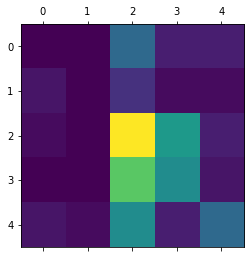

In [262]:
q = confusion_matrix(y_test, lin_pred)
plt.matshow(q)
plt.show()

In [247]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

forest_reg = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# # scores = cross_val_score(forest_reg, X_train, y_train.values.ravel(), scoring="neg_mean_squared_error", cv=10)
# rdf_scores = np.sqrt(-scores)
# display_scores(rdf_scores)

forest_reg.fit(X_train, y_train)
rf_predict = forest_reg.predict(X_test)

In [277]:
rf_acore = accuracy_score(y_test, rf_predict)
print('Accuracy = {:.2f} %'.format(rf_acore*100))
# rf_acore #Accuracy For after hiperparameter is changed

Accuracy = 60.61 %


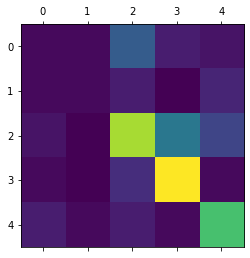

In [248]:
q = confusion_matrix(y_test, rf_predict)
plt.matshow(q)
plt.show()

In [ ]:
import seab
df_cm = pd.DataFrame(q, index = ['Wake', 'N1', 'N2', 'N3', 'N4', 'REM'],
                  columns = ['Wake', 'N1', 'N2', 'N3', 'N4', 'REM'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [245]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [1, 2, 3]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())
grid_search.best_params_

c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_features': 3, 'n_estimators': 30}

In [246]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [279]:
##########Training SVC########
from sklearn.svm import SVC

In [280]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
svc_clf_predict = svc_clf.predict(X_test)
svc_clf_acore_1 = accuracy_score(y_test, svc_clf_predict)
svc_clf_acore_1 #Accuracy For without setting any hiperparameter manually
print('Accuracy = {:.2f} %'.format(svc_clf_acore_1*100))

Accuracy = 43.03 %


c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


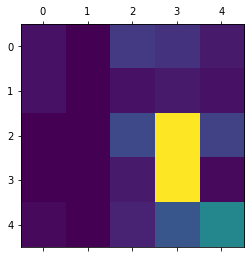

In [219]:
#Confusion Metrix
q = confusion_matrix(y_test, svc_clf_predict)
plt.matshow(q)
plt.show()

In [281]:
#Changing the Hiperparameters
svc_clf_1 = SVC(gamma='scale')
svc_clf_1.fit(X_train, y_train)
svc_clf_predict = svc_clf_1.predict(X_test)
svc_clf_acore = accuracy_score(y_test, svc_clf_predict)
svc_clf_acore #Accuracy For after hiperparameter is changed
print('Accuracy = {:.2f} %'.format(svc_clf_acore*100))

Accuracy = 43.03 %


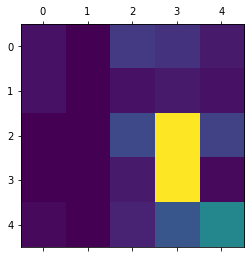

In [223]:
q = confusion_matrix(y_test, svc_clf_predict)
plt.matshow(q)
plt.show()

In [282]:
#Accuracy For with polykernel 
poly_kernel_svm_clf = SVC(kernel="poly")
poly_kernel_svm_clf.fit(X_train, y_train)
poly_kernel_svm_predict = poly_kernel_svm_clf.predict(X_test)
poly_kernel_svm_score = accuracy_score(y_test, poly_kernel_svm_predict)
poly_kernel_svm_score
print('Accuracy = {:.2f} %'.format(poly_kernel_svm_score*100))

Accuracy = 35.15 %


c:\users\pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


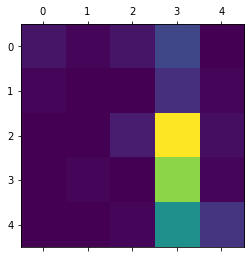

In [224]:
q = confusion_matrix(y_test, poly_kernel_svm_predict)
plt.matshow(q)
plt.show()

In [283]:
#Accuracy For with polykernel with hiperparameter set
poly_kernel_svm_clf = SVC(kernel="poly", gamma='scale')
poly_kernel_svm_clf.fit(X_train, y_train)
poly_kernel_svm_predict = poly_kernel_svm_clf.predict(X_test)
poly_kernel_svm_score = accuracy_score(y_test, poly_kernel_svm_predict)
poly_kernel_svm_score
print('Accuracy = {:.2f} %'.format(poly_kernel_svm_score*100))

Accuracy = 35.15 %


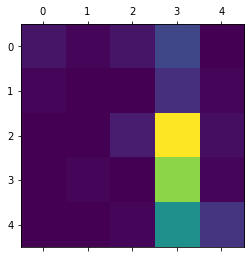

In [227]:
q = confusion_matrix(y_test, poly_kernel_svm_predict)
plt.matshow(q)
plt.show()

# Neural Netwoks

In [284]:
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
model = Sequential()